              precision    recall  f1-score   support

          No       0.73      0.87      0.80       277
         Yes       0.69      0.48      0.57       169

    accuracy                           0.72       446
   macro avg       0.71      0.67      0.68       446
weighted avg       0.72      0.72      0.71       446



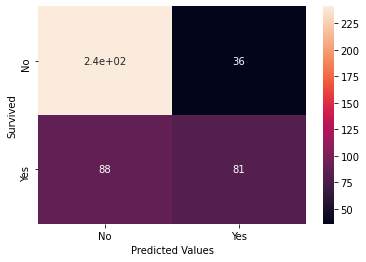

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (classification_report,roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("titanic_dataframe.csv")
data = data.drop("Unnamed: 0", axis = 1)

for i in ["Title","Sex"]:
    lbl = LabelEncoder()
    lbl.fit(data[i])
    data[i] = lbl.transform(data[i])
x=data[["Age","Pclass", "Fare"]]
y=data["Survived"]

lg = LogisticRegression()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)
lg.fit(x_train,y_train)
prediction = lg.predict(x_test)

mtrx = pd.crosstab(y_test,prediction, colnames =["Predicted Values"])
sns.heatmap(mtrx,annot = True)
print(classification_report(y_test,prediction))

we can notice that this model had 285 predictions out of 409 in total, out of the 169 survivors it predicted 81 and out of the 240 that did not survive it predicted 204. This confusion matrix also shows us that this model has an accuracy of 0.72
 a precision of 0,73 and a recall of 0.87 egarding the predictions of non-survival of certain individuals, a precision of 0.69 and a recall of 0.48 regarding the survival of certain individuals.

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

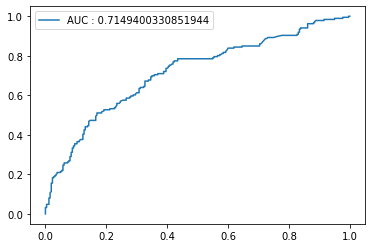

In [45]:
predictions_prob = lg.predict_proba(x_test)[::,1]
lbl_encd = LabelEncoder()
lbl_encd.fit(y_test)
y_test =  lbl_encd.transform(y_test)
fpr,tpr, n = metrics.roc_curve(y_test,predictions_prob)
auc = metrics.roc_auc_score(y_test,predictions_prob)
plt.plot(fpr,tpr,label=("AUC : "+ str(auc)))
plt.legend()

And the value of AUC tells us that the model made 71% approximtaly correct predictions out of all his predictions.